# LWFA data analysis

## run simulation

In [1]:
%matplotlib inline
import osiris

import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import matplotlib.colors as col

from osiris import tajima
from laser_2d import *

from osh5vis import osplot
from osh5io import read_h5
from osh5utils import fft
from ipywidgets import interact_manual,Layout,interact, FloatSlider
import ipywidgets as widgets
interact_calc=interact_manual.options(manual_name="Make New Input and Run")

In [2]:
moving_widget()

interactive(children=(Text(value='os-stdin', description='Template Input File:', layout=Layout(width='55%'), s…

## plot data

In [4]:
dirname = 'output'
file_id = 3
den_path = [dirname +'/MS/DENSITY/H2elec/charge/charge-H2elec-00000'+str(file_id)+'.h5']
field_obj = ['e1','e2','e3','b1','b2','b3','psi']
field_path = [dirname +'/MS/FLD/'+opt+'/'+opt+'-00000'+str(file_id)+'.h5' for opt in field_obj]
path = field_path+den_path
#print(path)

def getdata(id):
    f = h5.File(path[id],"r")
    datasetNames = [n for n in f.keys()] #Two Datasets: AXIS and e2
    field = datasetNames[-1]
    Field_dat = f[field][:].astype(float)

    a1_bounds = f['AXIS']['AXIS1']
    a2_bounds = f['AXIS']['AXIS2']

    xi_dat = np.linspace(0,a1_bounds[1]-a1_bounds[0] ,len(Field_dat[0]))
    r_dat = np.linspace(a2_bounds[0],a2_bounds[1],len(Field_dat))
    return Field_dat, r_dat, xi_dat


112


Text(0.5, 1.0, 'E2 on-axis')

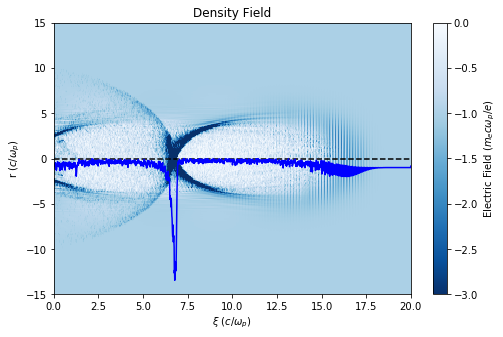

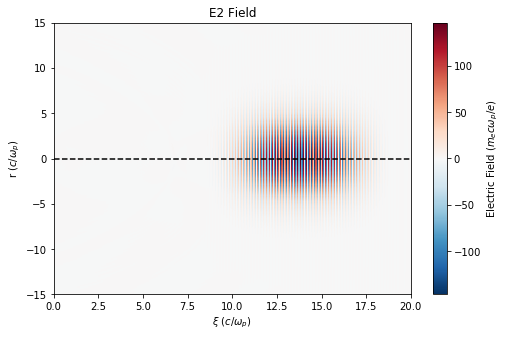

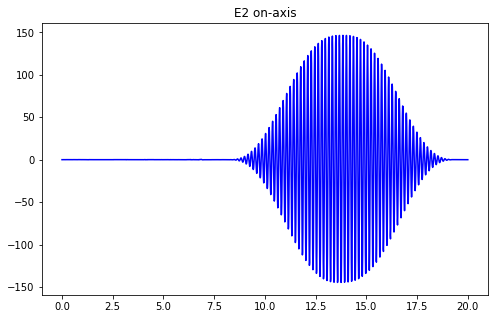

In [5]:
def den_plot():
    den,r,xi = getdata(-1)
    fig, ax = plt.subplots(figsize=(8,5))
    print(int(len(den)/2))
    colors = ax.pcolormesh(xi,r,den,vmin=-3,vmax=0,cmap="Blues_r")
 
    cbar = fig.colorbar(colors,ax=ax)
    cbar.set_label('Electric Field ($m_e c\omega_p / e$)')
    ax.plot(xi,den[int(len(den)/2)],'b')
    ax.hlines(r[int(len(den)/2)],xi[0],xi[-1],'k','--')
    ax.set_xlabel("$\\xi$ ($c/\omega_p$)")
    ax.set_ylabel('r ($c/\omega_p$)')
    ax.set_title('Density Field')
    
    return den,r,xi

def e2_plot():
    e2,r,xi = getdata(1)
    fig, ax = plt.subplots(figsize=(8,5))
    
    colors = ax.pcolormesh(xi,r,e2,vmin=-e2.max(),vmax=e2.max(),cmap="RdBu_r")
    
    cbar = fig.colorbar(colors,ax=ax)
    cbar.set_label('Electric Field ($m_e c\omega_p / e$)')
    ax.hlines(r[int(len(e2)/2)],xi[0],xi[-1],'k','--') 
    ax.set_xlabel("$\\xi$ ($c/\omega_p$)")
    ax.set_ylabel('r ($c/\omega_p$)')
    ax.set_title('E2 Field')


    return e2,r,xi    
den_plot() 
e2,r,xi=e2_plot()

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(xi,e2[int(len(e2)/2)],'b')
ax.set_title('E2 on-axis')